# Lab Assignment 3

## Hwayeon Kang, s2245661

We consider the system $$\frac{dx}{dt}=x(y-1),\quad \frac{dy}{dt}=4-y^2-x^2.$$

## Task 1 (2 marks)

Use `SymPy` to find the critical points of the system.

In [1]:
import sympy as sym
sym.init_printing()
from IPython.display import display_latex

# Define the equations
x = sym.Function('x')
y = sym.Function('y')
t = sym.symbols('t')
eq1 = sym.Eq(x(t).diff(t),(x(t)*(y(t)-1)))
eq2 = sym.Eq(y(t).diff(t),(4-y(t)**2-x(t)**2))
print("equations: ", [eq1, eq2])

# Form a Matrix ready to compute the Jacobian
FG = sym.Matrix([eq1.rhs, eq2.rhs])
print("Matrix to compute Jacobian: ", FG)

# Find the critical points
CPs = sym.solve(FG)
print("Critical points: ", CPs)

equations:  [Eq(Derivative(x(t), t), (y(t) - 1)*x(t)), Eq(Derivative(y(t), t), -x(t)**2 - y(t)**2 + 4)]
Matrix to compute Jacobian:  Matrix([[(y(t) - 1)*x(t)], [-x(t)**2 - y(t)**2 + 4]])
Critical points:  [{x(t): 0, y(t): -2}, {x(t): 0, y(t): 2}, {x(t): -sqrt(3), y(t): 1}, {x(t): sqrt(3), y(t): 1}]


## Task 2 (4 marks)

Give your implementation of the `linearise` function from Lab 3.

Use this to find linear approximations of the system around the critical points with $x \geq 0$ and $y \geq 0$. Use the output to classify these critical points (use markdown cells and proper reasoning to explain the type of each critical point).

In [2]:
# Create the linearise function
def linearise(system, vec0):
    matJ = FG.jacobian([x(t), y(t)])
    lin_mat = matJ.subs({x(t): vec0[0], y(t): vec0[1]})
    
    u = sym.Function('u')
    v = sym.Function('v')
    lin_rhs = lin_mat * sym.Matrix([u(t), v(t)])
    linsys = sym.Eq(sym.Matrix([u(t), v(t)]).diff(t), sym.MatMul(lin_mat, sym.Matrix([u(t), v(t)])))
    return linsys

all_linsys = []
EQs = [eq1, eq2]

for CP in CPs:
    if CP[x(t)] >= 0 and CP[y(t)] >= 0:
        display_latex(CP)
        vec0 = list(CP.values())
        print("Critical point "+str(vec0))
        print("Linearised system:")
        linsys = linearise(FG, vec0)
        display_latex(linsys)

Critical point [0, 2]
Linearised system:


Critical point [sqrt(3), 1]
Linearised system:


In [3]:
# Critical points classification using eigenvalues/vectors
def eigen(M):
    evs = M.eigenvects()
    res = []
    for ev in evs:
        e_val = ev[0]  # eigenvalue
        e_vects = ev[2]  # list of eigenvectors associated with this eigenvalue
        for e_vect in e_vects:
            res.append((e_val, e_vect))
    
    return res

sol1 = eigen(sym.Matrix(2,2,[1,0,0,-4]))
sol1

⎡⎛    ⎡0⎤⎞  ⎛   ⎡1⎤⎞⎤
⎢⎜-4, ⎢ ⎥⎟, ⎜1, ⎢ ⎥⎟⎥
⎣⎝    ⎣1⎦⎠  ⎝   ⎣0⎦⎠⎦

Here, you can see that there are two real eigenvalues with opposite signs, -4 < 0 < 1, so the critical point (0, 2) is a saddle point (unstable). 
$$|x| \to \infty \quad \text{as} \quad t \to \pm \infty$$

In [4]:
sol2 = eigen(sym.Matrix(2,2,[0,sym.sqrt(3), -2*sym.sqrt(3), -2]))
sol2

⎡⎛           ⎡  √3   √3⋅(-1 - √5⋅ⅈ)⎤⎞  ⎛           ⎡  √3   √3⋅(-1 + √5⋅ⅈ)⎤⎞⎤
⎢⎜           ⎢- ── - ──────────────⎥⎟  ⎜           ⎢- ── - ──────────────⎥⎟⎥
⎢⎜-1 - √5⋅ⅈ, ⎢  3          6       ⎥⎟, ⎜-1 + √5⋅ⅈ, ⎢  3          6       ⎥⎟⎥
⎢⎜           ⎢                     ⎥⎟  ⎜           ⎢                     ⎥⎟⎥
⎣⎝           ⎣          1          ⎦⎠  ⎝           ⎣          1          ⎦⎠⎦

Here, you can see that there are two complex eigenvalues with a negative real part, -1, so the critical point $(\sqrt{3}, 1)$ is a focus point (asymptotically stable). It spirals towards origin.

## Task 3 (4 marks)

Produce a phase portrait of the system, with trajectories showing the behaviour around all the critical points. A few trajectories are enough to show this behaviour. Use properly-sized arrows to diplay the vector field (the RHS of the ODE). There are some marks allocated to the quality of your figure in this part. Try to keep it illustrative yet not too cluttered.

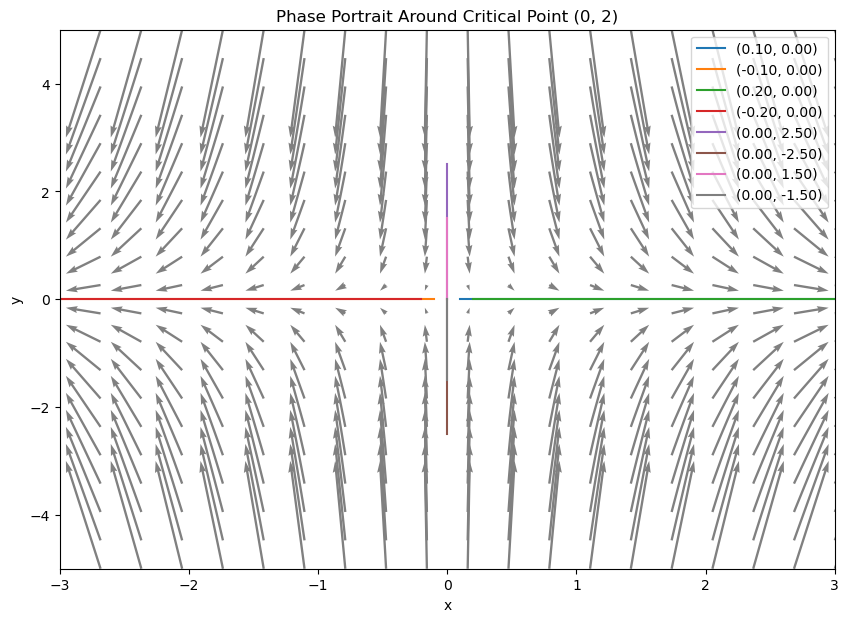

In [5]:
# Import packages
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

# Define vector field
def vField(x, t=0):
    u = x[0]
    v = -4 * x[1]
    return [u, v]

# Plot vector field
X, Y = np.mgrid[-3:3:20j, -5:5:20j]
U = X
V = -4 * Y

fig, ax = plt.subplots(figsize=(10, 7))
ax.quiver(X, Y, U, V, color='gray', scale=10, scale_units='xy', angles='xy')

# Plot trajectories
initial_conditions = [
    (0.1, 0), (-0.1, 0), (0.2, 0), (-0.2, 0),
    (0, 2.5), (0, -2.5), (0, 1.5), (0, -1.5)
]

for x0, y0 in initial_conditions:
    t = np.linspace(0, 10, 100)
    trajectory = odeint(vField, [x0, y0], t)
    ax.plot(trajectory[:, 0], trajectory[:, 1], label=f"({x0:.2f}, {y0:.2f})")


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-3, 3)
ax.set_ylim(-5, 5)
plt.title("Phase Portrait Around Critical Point (0, 2)")
plt.legend()
plt.show()

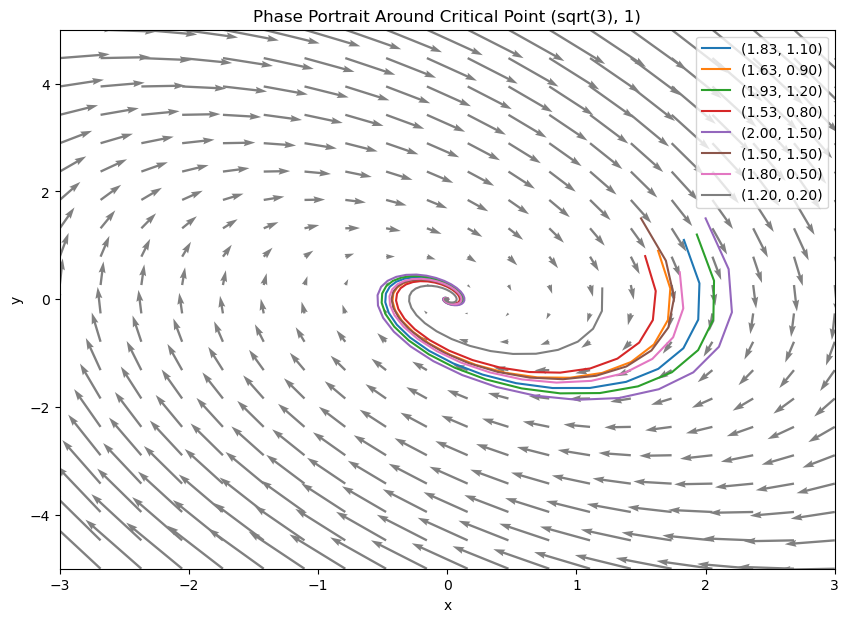

In [6]:
# Import packages
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

# Define vector field
def vField(x, t=0):
    u = np.sqrt(3) * x[1]
    v = -2 * np.sqrt(3) * x[0] - 2 * x[1]
    return [u, v]

# Plot vector field
X, Y = np.mgrid[-3:3:20j, -5:5:20j]
U = np.sqrt(3) * Y
V = -2 * np.sqrt(3) * X - 2 * Y

fig, ax = plt.subplots(figsize=(10, 7))
ax.quiver(X, Y, U, V, color='gray', scale=20, scale_units='xy', angles='xy')

# Plot trajectories
initial_conditions = [
    (np.sqrt(3) + 0.1, 1.1), (np.sqrt(3) - 0.1, 0.9), 
    (np.sqrt(3) + 0.2, 1.2), (np.sqrt(3) - 0.2, 0.8),
    (2, 1.5), (1.5, 1.5), (1.8, 0.5), (1.2, 0.2)
]

for x0, y0 in initial_conditions:
    t = np.linspace(0, 10, 100)
    trajectory = odeint(vField, [x0, y0], t)
    ax.plot(trajectory[:, 0], trajectory[:, 1], label=f"({x0:.2f}, {y0:.2f})")

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-3, 3)
ax.set_ylim(-5, 5)
plt.title("Phase Portrait Around Critical Point (sqrt(3), 1)")
plt.legend()
plt.show()

<div class="alert alert-danger">
    <h3>Submission instructions</h3>
    
<ul>

<li> Remember to submit <b>all</b> PDF, .py and .ipynb formats.</li>

<li> Note that if the plots are not appearing in your PDF, you should try replacing <code>%matplotlib notebook</code> with <code>%matplotlib inline</code>.</li>

<li> You should use a mix of code and markdown cells as needed, e.g. using markdown cells to write discussion points or conclusions, rather then typing these as comments within code.</li>

</ul>
    
</div>